# ML Pipeline & Hyper-Parameters Tuning

Practice Notebook for Creating Pipelines & Experimenting with GridSearchCV & RandomSearchCV.

## Datasets Used

- **miles per gallon:** car-mpg.csv
- **pima indians diabetes:** diabetes.csv
- **wisconsin breast cancer:** wisc_bc_data.csv

## Packages Used

- pandas, numpy
- matplotlib, seaborn
- sklearn, xgboost
- imbalanced-learn (imported as imblearn)

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.svm import SVC 
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelEncoder 
from sklearn.decomposition import PCA 

# Concepts to be practiced: Week 1

### Feature engineering:

Practice & Revise feature engineering concepts like:
* Missing values imputation
* K-Fold Cross Validation
* Leave One Out Cross Validation
* Up-Sampling & Down-Sampling (using imblearn)
* Regularization
    * Ridge
    * Lasso
* Error Function Graph

In [2]:
pima_diabetes_original = pd.read_csv('diabetes.csv')
pima_diabetes_original.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# see missing values
pima_diabetes_original['Insulin'].mean()
pima_diabetes_original['Insulin']=pima_diabetes_original['Insulin'].replace(to_replace = 0, value = pima_diabetes_original['Insulin'].mean())
pima_diabetes_original['SkinThickness']=pima_diabetes_original['SkinThickness'].replace(to_replace = 0, value = pima_diabetes_original['SkinThickness'].mean())

In [4]:
pima_diabetes_original.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1


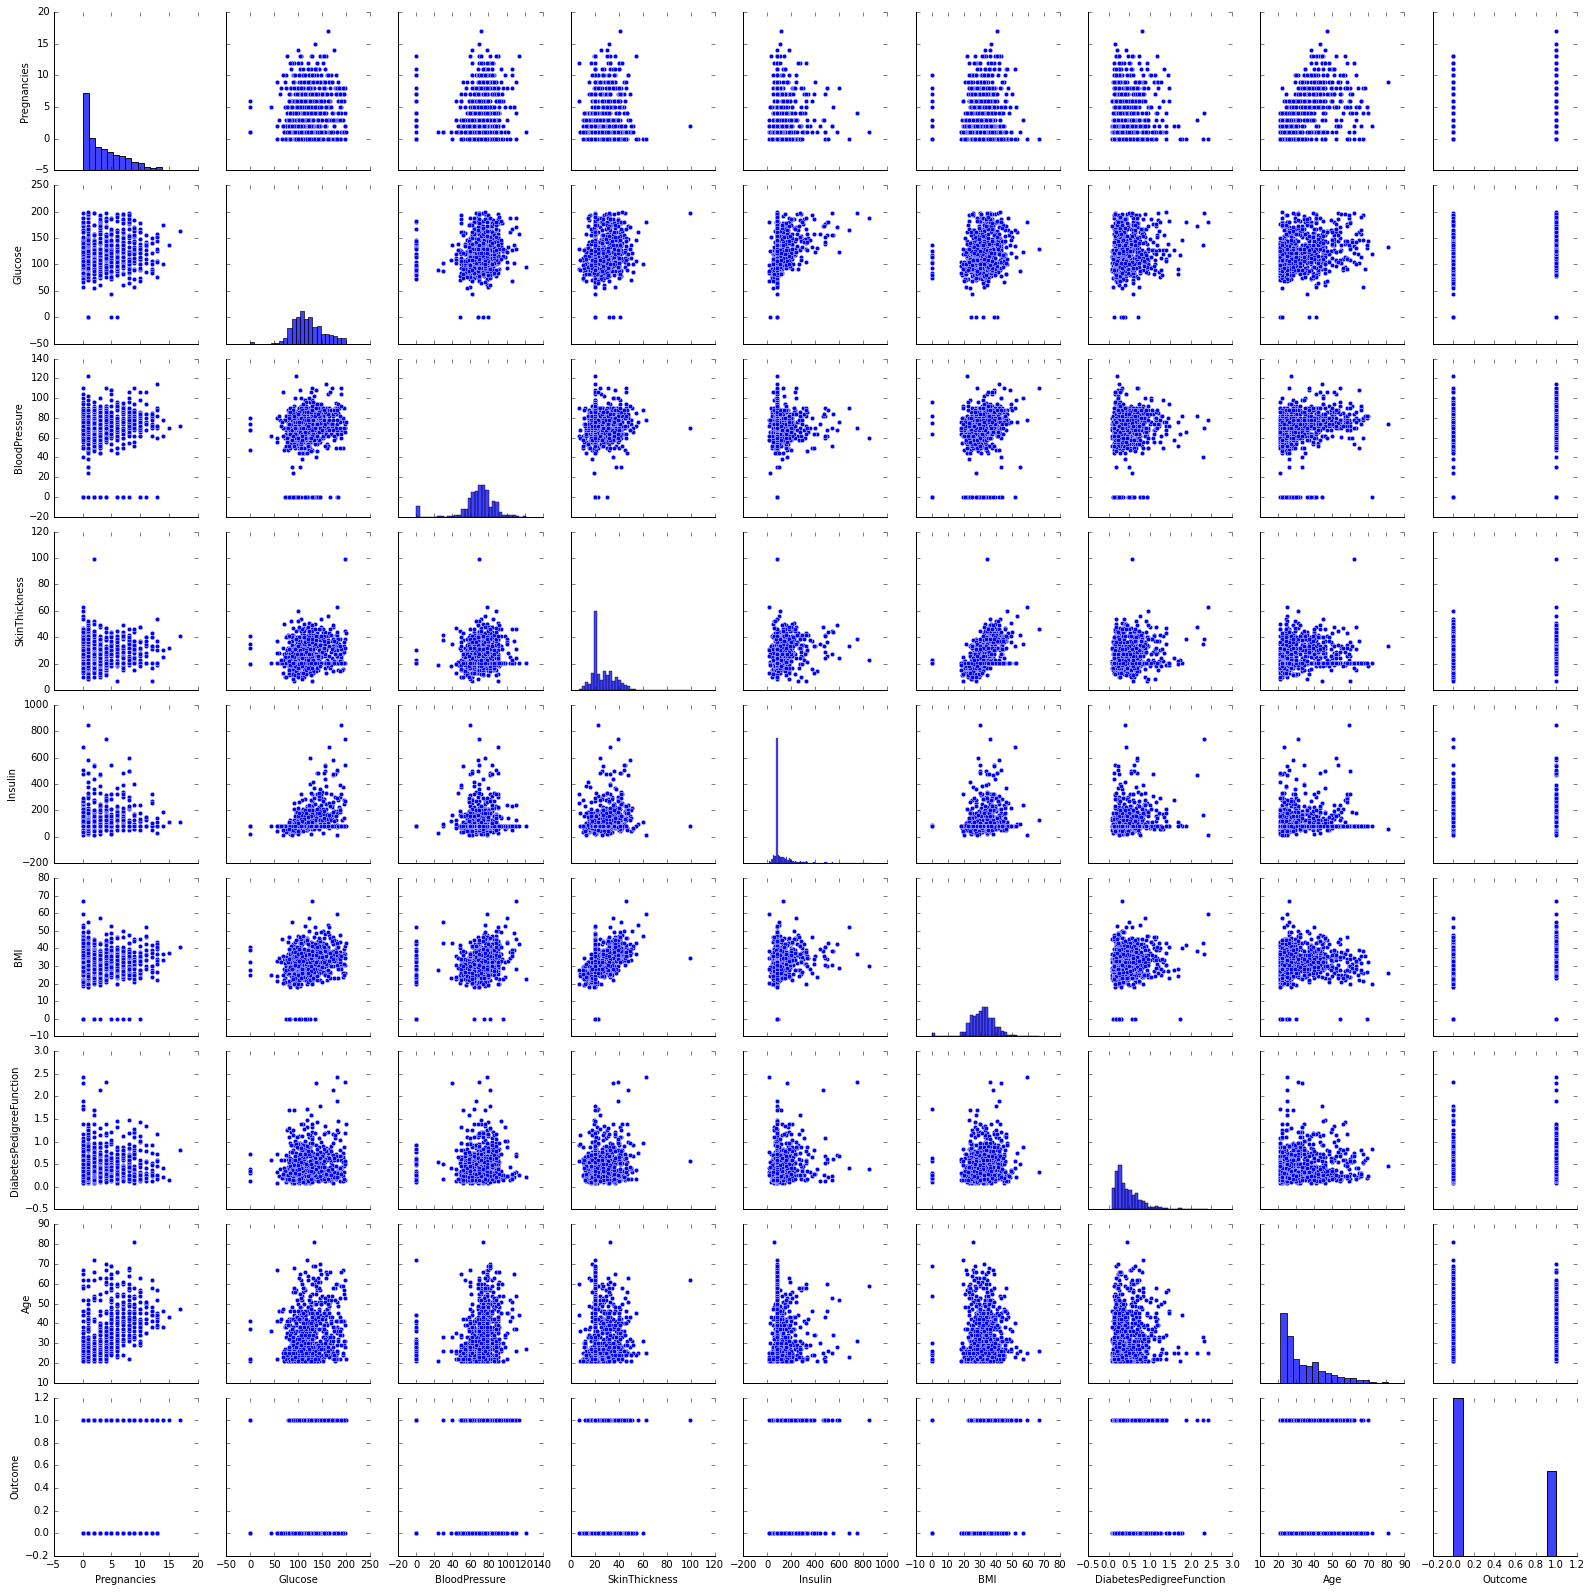

In [5]:
sns.pairplot(data=pima_diabetes_original)

<AxesSubplot:>

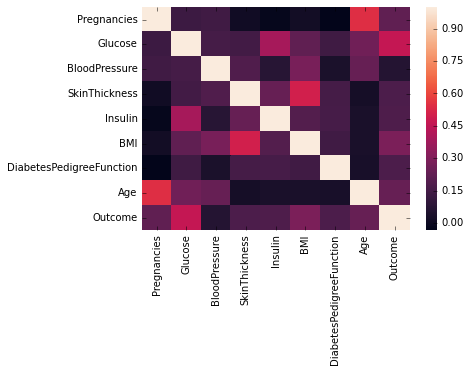

In [6]:
sns.heatmap(data=pima_diabetes_original.corr())

In [7]:
pima_diabetes_original.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.013376,-0.018082,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.145378,0.390835,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.180890,0.074858,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.013376,0.145378,0.180890,1.000000,0.240361,0.501131,0.154961,0.026423,0.175026
Insulin,-0.018082,0.390835,0.074858,0.240361,1.000000,0.189337,0.157806,0.038652,0.179185
BMI,0.017683,0.221071,0.281805,0.501131,0.189337,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.154961,0.157806,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.026423,0.038652,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.175026,0.179185,0.292695,0.173844,0.238356,1.000000


In [8]:
X_po = pima_diabetes_original.values[:,0:8]
Y_po = pima_diabetes_original.values[:,8]
X_train_po, X_test_po, Y_train_po, Y_test_po  = train_test_split(X_po, Y_po, test_size=0.30, random_state=1, stratify=Y_po)

In [9]:
folds = 10
seed = 1
kfold = KFold(n_splits=folds, random_state = seed, shuffle=True)
logistic_model = LogisticRegression(max_iter=200)
results = cross_val_score(logistic_model, X_train_po, Y_train_po, cv=kfold, scoring = 'roc_auc')
print(results*100)
print(f'Accuracy: {results.mean()*100}\nStandard Deviation: {results.std()*100}')

[83.15789474 88.57142857 91.90340909 86.58008658 77.93209877 86.645469
 76.69172932 77.61904762 81.81818182 79.3040293 ]
Accuracy: 83.02233748076758
Standard Deviation: 4.95910636106468


In [10]:
fold_scaled=50
scaled_seed = 1
kfold_scaled = KFold(n_splits=fold_scaled, random_state = scaled_seed, shuffle=True)
scaler = StandardScaler()
scaler.fit(X_train_po)
scaler.transform(X_train_po)
scaled_log_model = LogisticRegression(max_iter=500)
scaled_results = cross_val_score(scaled_log_model, X_train_po, Y_train_po, cv=kfold_scaled, scoring='roc_auc')
print(scaled_results*100)
print(f'Accuracy: {scaled_results.mean()*100}\nStd: {scaled_results.std()*100}')

[ 91.66666667  87.5         95.83333333  73.33333333  82.14285714
  89.28571429  93.33333333  95.83333333  40.          96.66666667
  96.42857143 100.          87.5         82.14285714  96.66666667
  80.          95.83333333  86.66666667  96.42857143  79.16666667
  92.85714286  79.16666667  60.71428571  96.66666667  75.
  70.         100.         100.          83.33333333 100.
  66.66666667  67.85714286  82.14285714  58.33333333  71.42857143
  82.14285714  78.57142857  58.33333333  70.83333333  75.
  75.         100.          85.71428571  87.5         88.
  43.75        81.25        83.33333333 100.          61.9047619 ]
Accuracy: 82.43857142857144
Std: 14.424441763250526


In [11]:
kfold_scaled_stratified = KFold(n_splits=fold_scaled, random_state = scaled_seed, shuffle=True)
scaled_log_model_stratified = LogisticRegression(max_iter=500)
scaled_results_stratified = cross_val_score(scaled_log_model_stratified, X_train_po, Y_train_po, cv=kfold_scaled_stratified, scoring='roc_auc')
print(scaled_results_stratified*100)
print(f'Accuracy: {scaled_results_stratified.mean()*100}\nStd: {scaled_results_stratified.std()*100}')

[ 91.66666667  87.5         95.83333333  73.33333333  82.14285714
  89.28571429  93.33333333  95.83333333  40.          96.66666667
  96.42857143 100.          87.5         82.14285714  96.66666667
  80.          95.83333333  86.66666667  96.42857143  79.16666667
  92.85714286  79.16666667  60.71428571  96.66666667  75.
  70.         100.         100.          83.33333333 100.
  66.66666667  67.85714286  82.14285714  58.33333333  71.42857143
  82.14285714  78.57142857  58.33333333  70.83333333  75.
  75.         100.          85.71428571  87.5         88.
  43.75        81.25        83.33333333 100.          61.9047619 ]
Accuracy: 82.43857142857144
Std: 14.424441763250526


In [12]:
cv = LeaveOneOut()
data = pima_diabetes_original.values
X_loo_cv = data[:, 0:8]
Y_loo_cv = data[:,8]
loo_log_reg_model = LogisticRegression(max_iter=200, random_state=1)
accuracy_scores = cross_val_score(loo_log_reg_model, X_loo_cv, Y_loo_cv, scoring='accuracy', cv=cv, n_jobs=-1)
print(f'Accuracy: {accuracy_scores.mean()*100}\nStd: {accuracy_scores.std()*100}')

Accuracy: 77.34375
Std: 41.8607135144338


In [13]:
cv_scaled = LeaveOneOut()
pima_diabetes_scaled = pima_diabetes_original.copy()
std_scaler = StandardScaler()
data_scaled = pima_diabetes_scaled.values
X_loo_cv_scaled = data_scaled[:, 0:8]
Y_loo_cv_scaled = data_scaled[:,8]
std_scaler.fit(X_loo_cv_scaled)
std_scaler.transform(X_loo_cv_scaled)
loo_scaled_log_reg_model = LogisticRegression(max_iter=200, random_state=1)
accuracy_scores_scaled = cross_val_score(loo_scaled_log_reg_model, X_loo_cv_scaled, Y_loo_cv_scaled, scoring='accuracy', cv=cv_scaled, n_jobs=-1)
print(f'Accuracy: {accuracy_scores_scaled.mean()*100}\nStd: {accuracy_scores_scaled.std()*100}')

Accuracy: 77.34375
Std: 41.8607135144338


In [14]:
loo_scaled_rf_model = RandomForestClassifier(random_state=10)
rf_accuracy_scores_scaled = cross_val_score(loo_scaled_rf_model, X_loo_cv_scaled, Y_loo_cv_scaled, scoring='accuracy', cv=cv_scaled, n_jobs=-1)
print(f'Accuracy: {rf_accuracy_scores_scaled.mean()*100}\nStd: {rf_accuracy_scores_scaled.std()*100}')

Accuracy: 75.52083333333334
Std: 42.996361078261295


In [15]:
pima_diabetes_original.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [16]:
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)
X_loo_cv_scaled_up, Y_loo_cv_scaled_up = sm.fit_resample(X_loo_cv_scaled, Y_loo_cv_scaled)
loo_scaled_up_rf_model = RandomForestClassifier(random_state=10)
rf_accuracy_scores_scaled_up = cross_val_score(loo_scaled_up_rf_model, X_loo_cv_scaled_up, Y_loo_cv_scaled_up, scoring='accuracy', cv=cv_scaled, n_jobs=-1)
print(f'Accuracy: {rf_accuracy_scores_scaled_up.mean()*100}\nStd: {rf_accuracy_scores_scaled_up.std()*100}')

Accuracy: 82.6
Std: 37.91094828674165


In [18]:
loo_scaled_up_log_reg_model = LogisticRegression(max_iter=100, random_state=1)
lr_accuracy_scores_scaled_up = cross_val_score(loo_scaled_up_log_reg_model, X_loo_cv_scaled_up, Y_loo_cv_scaled_up, scoring='accuracy', cv=cv_scaled, n_jobs=-1)
print(f'Accuracy: {lr_accuracy_scores_scaled_up.mean()*100}\nStd: {lr_accuracy_scores_scaled_up.std()*100}')


Accuracy: 74.2
Std: 43.75339986789598


In [19]:
tl = TomekLinks()
X_loo_cv_scaled_down, Y_loo_cv_scaled_down = sm.fit_resample(X_loo_cv_scaled, Y_loo_cv_scaled)
loo_scaled_down_rf_model = RandomForestClassifier(random_state=10)
rf_accuracy_scores_scaled_down = cross_val_score(loo_scaled_down_rf_model, X_loo_cv_scaled_down, Y_loo_cv_scaled_down, scoring='accuracy', cv=cv_scaled, n_jobs=-1)
print(f'Accuracy: {rf_accuracy_scores_scaled_down.mean()*100}\nStd: {rf_accuracy_scores_scaled_down.std()*100}')


Accuracy: 82.6
Std: 37.91094828674165


In [28]:
vanilla_log_regression = LogisticRegression()
X_vanilla = pima_diabetes_original.values[:,0:8]
Y_vanilla = pima_diabetes_original.values[:,8]
X_train_vanilla, X_test_vanilla, Y_train_vanilla, Y_test_vanilla = train_test_split(
    X_vanilla, Y_vanilla, test_size=0.30, random_state=1, stratify=Y_vanilla)

In [30]:
# fit 2 models without any hyper-parameters
vanilla_logistic_regression = LogisticRegression(random_state=1, max_iter=200)
vanilla_random_forest = RandomForestClassifier(random_state=1)
vanilla_ridge_classifier = RidgeClassifier()
vanilla_logistic_regression.fit(X_train_vanilla, Y_train_vanilla)
vanilla_random_forest.fit(X_train_vanilla, Y_train_vanilla)
vanilla_ridge_classifier.fit(X_train_vanilla, Y_train_vanilla)

RidgeClassifier()

In [31]:
vanilla_logistic_regression.coef_

array([[ 1.49906079e-01,  3.27293583e-02, -1.67087315e-02,
         1.77486362e-03,  5.89822337e-04,  9.20312200e-02,
         9.29631491e-01,  1.73140347e-02]])

In [33]:
vanilla_ridge_classifier.coef_

array([[ 5.05236673e-02,  1.09457214e-02, -5.49430566e-03,
         3.60527048e-04,  3.06476684e-04,  2.60073682e-02,
         3.30260765e-01,  5.91137409e-03]])

In [39]:
y_logit = vanilla_logistic_regression.predict(X_test_vanilla)
y_rf = vanilla_random_forest.predict(X_test_vanilla)
y_ridge = vanilla_ridge_classifier.predict(X_test_vanilla)
accuracy_metric_logit = accuracy_score(Y_test_vanilla, y_logit, normalize=True)
accuracy_metric_rf = accuracy_score(Y_test_vanilla, y_rf, normalize=True)
accuracy_metric_ridge = accuracy_score(Y_test_vanilla, y_ridge, normalize=True)

In [41]:
print(f'Logit: {accuracy_metric_logit}')
print(f'RF: {accuracy_metric_rf}')
print(f'Ridge: {accuracy_metric_ridge}')

Logit: 0.7575757575757576
RF: 0.7402597402597403
Ridge: 0.7445887445887446


In [ ]:
## Ridge & Lasso vs Linear Regression

In [44]:
auto_mpg = pd.read_csv('car-mpg.csv')
auto_mpg = auto_mpg.drop('car_name', axis=1)
auto_mpg['origin'] = auto_mpg['origin'].replace({1: 'america', 2: 'europe', 3:'asia'})
auto_mpg = pd.get_dummies(auto_mpg, columns=['origin'])
auto_mpg = auto_mpg.replace('?', np.nan)
auto_mpg = auto_mpg.apply(lambda x: x.fillna(x.median()), axis=0)
X_mpg = auto_mpg.drop('mpg', axis=1)
Y_mpg = auto_mpg[['mpg']]
X_train_reg, X_test_reg, Y_train_reg, Y_test_reg = train_test_split(X_mpg, Y_mpg, test_size=0.3)

In [48]:
linear_regression = LinearRegression()
ridge_regression = Ridge()
lasso_regression = Lasso()
linear_regression.fit(X_train_reg, Y_train_reg)
ridge_regression.fit(X_train_reg, Y_train_reg)
lasso_regression.fit(X_train_reg, Y_train_reg)

Lasso()

In [50]:
print(f'linear_regression: {linear_regression.coef_}')
print(f'ridge_regression: {ridge_regression.coef_}')
print(f'lasso_regression: {lasso_regression.coef_}')

linear_regression: [[ 1.18408083  0.02399089 -0.02644106 -0.00684992  0.12382037  0.73553553
   5.5608284  -1.60785767  0.70924454  0.89861313]]
ridge_regression: [[ 0.99827373  0.02414701 -0.02371182 -0.00689929  0.12394767  0.7404773
   4.99045464 -1.62169709  0.70038756  0.92130953]]
lasso_regression: [-0.         -0.          0.         -0.00672956  0.          0.67700542
  0.         -0.          0.          0.        ]


In [51]:
print(f'LR-Training: {linear_regression.score(X_train_reg, Y_train_reg)}')
print(f'LR-Test: {linear_regression.score(X_test_reg, Y_test_reg)}\n')
print(f'Ridge-Training: {ridge_regression.score(X_train_reg, Y_train_reg)}')
print(f'Ridge-Test: {ridge_regression.score(X_test_reg, Y_test_reg)}\n')
print(f'Lasso-Training: {lasso_regression.score(X_train_reg, Y_train_reg)}')
print(f'Lasso-Test: {lasso_regression.score(X_test_reg, Y_test_reg)}')

LR-Training: 0.83816592223522
LR-Test: 0.8442897135875118

Ridge-Training: 0.8379941082237437
Ridge-Test: 0.8445438271930927

Lasso-Training: 0.8016186275296281
Lasso-Test: 0.8178248576159135


# Concepts to be Practiced: Week 2

Practice & Revise the Pipeline & Hyper-parameter tuning, conecpts to be practiced are:
* Building pipelines
* Train, Validation & Test Sets
* Hyper-parameter tuning
* Grid Search Cross Validation
* Random Search Cross Validation

In [53]:
pima_df = pd.read_csv("diabetes.csv")
array = pima_df.values
X = array[:,0:7] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

numpy.ndarray

In [54]:
# it takes a list of tuples as parameter. The last entry is the call to the modelling algorithm
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', LogisticRegression())
])

# use the pipeline object as you would
# a regular classifier
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', LogisticRegression())])

In [56]:
y_predict = pipeline.predict(X_test)
model_score = pipeline.score(X_test, y_test)
print(model_score)
print()
print(metrics.confusion_matrix(y_test, y_predict))

0.7792207792207793

[[132  15]
 [ 36  48]]


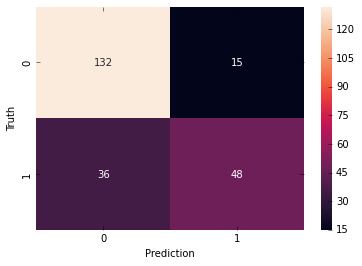

In [62]:
ax = sns.heatmap(metrics.confusion_matrix(y_test, y_predict), annot=True, fmt="d")
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show()

In [63]:
# load and split the data 
cancer = load_breast_cancer() 
X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, random_state = 0) # compute minimum and maximum on the training data 
scaler = MinMaxScaler().fit( X_train)

In [64]:
X_train_scaled = scaler.transform( X_train) 
svm = SVC() # learn an SVM on the scaled training data svm.fit( X_train_scaled, y_train)
svm.fit( X_train_scaled, y_train)

X_test_scaled = scaler.transform( X_test) 
print(" Test score: {:.2f}".format( svm.score( X_test_scaled, y_test)))

 Test score: 0.97


In [65]:
pipe = Pipeline([(" scaler", MinMaxScaler()), (" svm", SVC())])

In [66]:
pipe.fit( X_train, y_train)

Pipeline(steps=[(' scaler', MinMaxScaler()), (' svm', SVC())])

In [67]:
print(" Test score: {:.2f}". format( pipe.score( X_test, y_test)))

 Test score: 0.97


In [68]:
y_pred = pipe.predict(X_test)

In [69]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        53
           1       0.97      0.99      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [71]:
pipe = make_pipeline( MinMaxScaler(), (SVC())) 
print(" Pipeline steps:\ n{}". format( pipe.steps))

 Pipeline steps:\ n[('minmaxscaler', MinMaxScaler()), ('svc', SVC())]


In [72]:
pipe.fit( X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svc', SVC())])

In [73]:
print(" Test score: {:.2f}". format( pipe.score( X_test, y_test)))

 Test score: 0.97


# Grid Search CV

In [75]:
iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,random_state = 7)

In [77]:
knn_clf = KNeighborsClassifier()

In [78]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [79]:
param_grid = {'n_neighbors': list(range(1,9)),
             'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }

In [81]:
gs = GridSearchCV(knn_clf,param_grid,cv=10)
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [82]:
gs.best_params_

{'algorithm': 'brute', 'n_neighbors': 1}

In [83]:
gs.cv_results_['params']

[{'algorithm': 'auto', 'n_neighbors': 1},
 {'algorithm': 'auto', 'n_neighbors': 2},
 {'algorithm': 'auto', 'n_neighbors': 3},
 {'algorithm': 'auto', 'n_neighbors': 4},
 {'algorithm': 'auto', 'n_neighbors': 5},
 {'algorithm': 'auto', 'n_neighbors': 6},
 {'algorithm': 'auto', 'n_neighbors': 7},
 {'algorithm': 'auto', 'n_neighbors': 8},
 {'algorithm': 'ball_tree', 'n_neighbors': 1},
 {'algorithm': 'ball_tree', 'n_neighbors': 2},
 {'algorithm': 'ball_tree', 'n_neighbors': 3},
 {'algorithm': 'ball_tree', 'n_neighbors': 4},
 {'algorithm': 'ball_tree', 'n_neighbors': 5},
 {'algorithm': 'ball_tree', 'n_neighbors': 6},
 {'algorithm': 'ball_tree', 'n_neighbors': 7},
 {'algorithm': 'ball_tree', 'n_neighbors': 8},
 {'algorithm': 'kd_tree', 'n_neighbors': 1},
 {'algorithm': 'kd_tree', 'n_neighbors': 2},
 {'algorithm': 'kd_tree', 'n_neighbors': 3},
 {'algorithm': 'kd_tree', 'n_neighbors': 4},
 {'algorithm': 'kd_tree', 'n_neighbors': 5},
 {'algorithm': 'kd_tree', 'n_neighbors': 6},
 {'algorithm': 'kd

In [84]:
gs.cv_results_['mean_test_score']

array([0.9469697 , 0.93787879, 0.95530303, 0.93787879, 0.95530303,
       0.9469697 , 0.95530303, 0.95530303, 0.9469697 , 0.93787879,
       0.95530303, 0.93787879, 0.95530303, 0.9469697 , 0.95530303,
       0.95530303, 0.9469697 , 0.93787879, 0.95530303, 0.93787879,
       0.95530303, 0.9469697 , 0.95530303, 0.95530303, 0.96515152,
       0.92878788, 0.95530303, 0.93787879, 0.95530303, 0.95530303,
       0.96439394, 0.95530303])

# Random Search CV vs Grid Search CV

In [86]:
# get data
digits = load_digits()  # Source : http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits
X, y = digits.data, digits.target
# build a classifier
clf = RandomForestClassifier(n_estimators=50)
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples) #default cv = 3

randomCV.fit(X, y)

 
print(randomCV.best_params_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 5, 'min_samples_split': 6}


In [87]:
# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [88]:
grid_search.cv_results_['mean_test_score']

array([0.82805942, 0.8041334 , 0.80579387, 0.80193593, 0.81023058,
       0.81691117, 0.81472454, 0.81303157, 0.83419684, 0.8341953 ,
       0.83473383, 0.84585577, 0.84475859, 0.84754101, 0.84085887,
       0.84696688, 0.83139431, 0.84364748, 0.81692665, 0.8219282 ,
       0.82472919, 0.81191736, 0.83029248, 0.82247756, 0.81247292,
       0.82694831, 0.82748839, 0.9293454 , 0.92266326, 0.91654751,
       0.90209533, 0.90763541, 0.90763541, 0.88705354, 0.88037914,
       0.87759053, 0.93546735, 0.93547509, 0.93267564, 0.92878211,
       0.92489013, 0.91877747, 0.90317703, 0.8998468 , 0.90985144,
       0.9299087 , 0.93268028, 0.93324667, 0.92489786, 0.92545187,
       0.92378521, 0.90430672, 0.90153203, 0.90819561, 0.81858558,
       0.79800062, 0.82805169, 0.82526772, 0.838632  , 0.81135716,
       0.8141628 , 0.81136181, 0.80192201, 0.8369576 , 0.84196224,
       0.84363665, 0.83974157, 0.84253637, 0.84643145, 0.84253791,
       0.85030486, 0.84141907, 0.83362891, 0.83305788, 0.83806

In [89]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, max_features=3, n_estimators=50)

# Pipeline & Grid Search CV

In [90]:
df = pd.read_csv('wisc_bc_data.csv')
df.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [91]:
X = df.iloc[:, 1:].values 
y = df.iloc[:, 0].values 
print(X.shape)
print(y.shape)
print(df.info())

(569, 30)
(569,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area erro

In [93]:
le = LabelEncoder() 
y = le.fit_transform(y)

le.transform(['M', 'B'])

array([1, 0])

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=0)

In [96]:
pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), ('clf', LogisticRegression(random_state=1))]) 
pipe_lr.fit(X_train, y_train) 
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.936


In [97]:
pipe_svc = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('svc', SVC())]) 


param_grid = {'pca__n_components':[14,15],'svc__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svc__gamma': [0.001, 0.01, 0.1, 1, 10], 'svc__kernel':['rbf','poly']} 

grid = GridSearchCV( pipe_svc , param_grid = param_grid, cv = 5) 

grid.fit( X_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid.best_score_)) 
print(" Best parameters: ", grid.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid.score( X_test, y_test)))

 Best cross-validation accuracy: 0.98
 Best parameters:  {'pca__n_components': 14, 'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
 Test set accuracy: 0.99


In [98]:
predictions = grid.predict(X_test)

In [99]:
predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [100]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

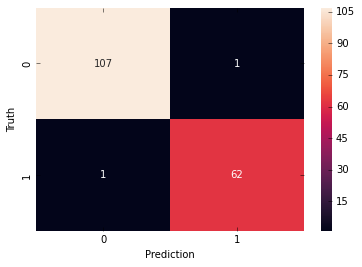

In [101]:
ax = sns.heatmap(metrics.confusion_matrix(y_test, predictions), annot=True, fmt="d")
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show()